In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt
import sys

(x_train,y_train), (x_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

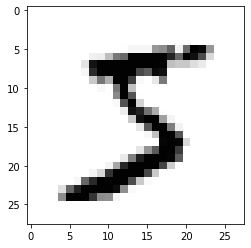

In [5]:
plt.imshow(x_train[0],cmap='Greys')
plt.show()

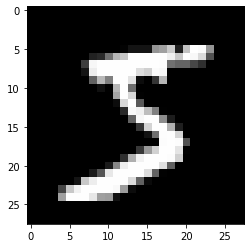

In [8]:
plt.imshow(x_train[0],cmap='Greys_r')
plt.show()

In [9]:
x_train = x_train.reshape(x_train.shape[0],784)

In [10]:
x_train = x_train.astype("float64")
x_train = x_train/255

In [11]:
x_train.shape

(60000, 784)

In [12]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [13]:
y_train.shape

(60000, 10)

In [14]:
y_test.shape

(10000, 10)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(512,input_dim=784,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

modelpath = "./mnist_mip.hdf5"
cp = ModelCheckpoint(filepath=modelpath, monitor='val_loss',vervbose=1, save_best_only=True,patience=10)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(x_train,y_train,validation_split=0.25, epochs=30, batch_size=200, verbose=0,callbacks=[early_stopping_callback,cp])

(10000, 784) (10000, 10)
313/313 [==============================] - 1s 3ms/step - loss: 2.4343 - accuracy: 0.0892
[0.186613067984581, 0.13229939341545105, 0.10967881977558136, 0.10098154097795486, 0.09371549636125565, 0.09205134958028793, 0.08754558116197586, 0.0882878452539444, 0.08062327653169632, 0.08309715986251831, 0.07933138310909271, 0.07922609895467758, 0.08176465332508087, 0.08306308090686798, 0.08504290878772736, 0.09028486162424088, 0.08689996600151062, 0.08480136841535568, 0.08545058965682983, 0.09421579539775848, 0.11667799949645996, 0.09211534261703491]
[0.34634724259376526, 0.14666587114334106, 0.0983043909072876, 0.07081109285354614, 0.054785266518592834, 0.04242709279060364, 0.03368465602397919, 0.025045575574040413, 0.02054312825202942, 0.014803810976445675, 0.011945352889597416, 0.008617597632110119, 0.0065361130982637405, 0.005154214333742857, 0.004524615593254566, 0.003696488682180643, 0.002950430614873767, 0.0021465783938765526, 0.0015802498674020171, 0.0017040729

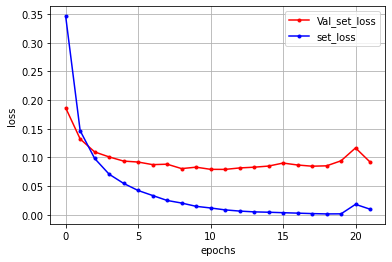

In [27]:
x_test = x_test.reshape(x_test.shape[0],784)
x_test = x_test.astype("float64")
x_test = x_test/255
print(x_test.shape,y_test.shape)
model.evaluate(x_test,y_test)
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
print(y_vloss)
print(y_loss)
x_len = np.arange(len(y_loss))
plt.plot(x_len,y_vloss,marker=".", c="red", label="Val_set_loss")
plt.plot(x_len,y_loss,marker=".", c="blue", label="set_loss")
plt.legend()
plt.grid()
plt.xlabel('epochs')
plt.ylabel("loss")
plt.show()

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np


In [3]:
(x_train, y_train), (x_test,y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0],28,28,1).astype("float32")/255
x_train = x_test.reshape(x_test.shape[0],28,28,1).astype("float32")/255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_1 (Dense)             (None, 128)               1179776   
                                                      